In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/jupyter/docker-demo-images/master/datasets/car/Robey.csv

--2020-09-19 08:20:07--  https://raw.githubusercontent.com/jupyter/docker-demo-images/master/datasets/car/Robey.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1388 (1.4K) [text/plain]
Saving to: ‘Robey.csv’

Robey.csv           100%[===================>]   1.36K  --.-KB/s    in 0s      

2020-09-19 08:20:07 (28.4 MB/s) - ‘Robey.csv’ saved [1388/1388]



In [19]:
df = pd.read_csv('./Robey.csv')

In [20]:
df.describe()

,tfr,contraceptors
count,50.000000,50.00000
mean,4.688000,37.44000
std,1.453446,22.89832
min,1.700000,4.00000
25%,3.600000,12.25000
50%,4.600000,41.00000
75%,5.975000,55.00000
max,7.300000,77.00000


In [22]:
df.rename(columns={'Unnamed: 0': 'country'}, inplace=True)
df.head(50)

,country,region,tfr,contraceptors
0,Botswana,Africa,4.8,35
1,Burundi,Africa,6.5,9
2,Cameroon,Africa,5.9,16
3,Ghana,Africa,6.1,13
4,Kenya,Africa,6.5,27
5,Liberia,Africa,6.4,6
6,Mali,Africa,6.8,5
7,Mauitius,Africa,2.2,75
8,Niger,Africa,7.3,4
9,Nigeria,Africa,5.7,6


## Basic Query using Pandas

In [23]:
# SELECT * from country='Vietnam'
df[df['country'] == "Vietnam"]

,country,region,tfr,contraceptors
27,Vietnam,Asia,3.9,53


In [24]:
# COUNT *
df.count()

country          50
region           50
tfr              50
contraceptors    50
dtype: int64

In [26]:
# COUNT Country GroupBy Region
a = df.groupby('region')['country'].count()
print(a)

region
Africa        18
Asia          10
Latin.Amer    16
Near.East      6
Name: country, dtype: int64


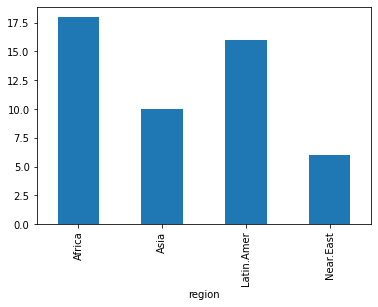

In [ ]:
a.plot(kind='bar')

In [27]:
# SELECT * FROM tft >= 5.5 and tfr <=7 and region != Africa
b = df.loc[((df['tfr'] >= 5.5) & (df['tfr'] <= 7)) & (df['region'] !='Africa')]
b

,country,region,tfr,contraceptors
18,Bangladesh,Asia,5.5,40
36,Guatemala,Latin.Amer,5.6,23
37,Haiti,Latin.Amer,6.0,10
45,Jordan,Near.East,5.5,35
49,Yemen,Near.East,7.0,7


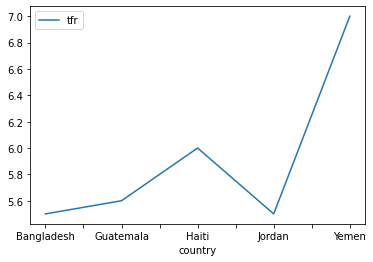

In [ ]:
b.plot(x = 'country', y='tfr')

## Pandas to SQLite

In [28]:
conn = sql.connect('robey.db')
df.to_sql('robey', conn)

In [58]:
conn = sql.connect('robey.db')

In [59]:
robey = pd.read_sql('SELECT * FROM robey', conn)
robey.head(10)

,index,country,region,tfr,contraceptors
0,0,Botswana,Africa,4.8,35
1,1,Burundi,Africa,6.5,9
2,2,Cameroon,Africa,5.9,16
3,3,Ghana,Africa,6.1,13
4,4,Kenya,Africa,6.5,27
5,5,Liberia,Africa,6.4,6
6,6,Mali,Africa,6.8,5
7,7,Mauitius,Africa,2.2,75
8,8,Niger,Africa,7.3,4
9,9,Nigeria,Africa,5.7,6


In [60]:
pd.read_sql('SELECT * FROM robey WHERE country="Vietnam"', conn)

,index,country,region,tfr,contraceptors
0,27,Vietnam,Asia,3.9,53


In [61]:
pd.read_sql('''SELECT COUNT(country) AS country, 
COUNT(region) AS region,
COUNT(tfr) AS tfr,
COUNT(contraceptors) AS contraceptors
FROM robey''', conn)

,country,region,tfr,contraceptors
0,50,50,50,50


In [62]:
r = pd.read_sql('''SELECT region, COUNT(country) AS count
FROM robey
GROUP BY region''', conn)
r

,region,count
0,Africa,18
1,Asia,10
2,Latin.Amer,16
3,Near.East,6


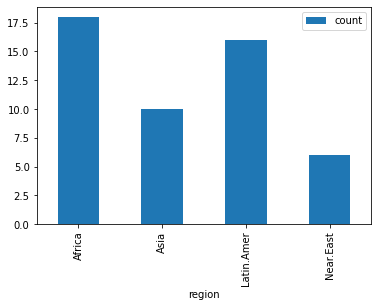

In [63]:
r.plot(kind='bar', x='region')

In [75]:
r = pd.read_sql('''SELECT *
FROM robey
WHERE tfr >= 5.5 AND tfr <=7 AND region != "Africa"''', conn)
r

,index,country,region,tfr,contraceptors
0,18,Bangladesh,Asia,5.5,40
1,36,Guatemala,Latin.Amer,5.6,23
2,37,Haiti,Latin.Amer,6.0,10
3,45,Jordan,Near.East,5.5,35
4,49,Yemen,Near.East,7.0,7


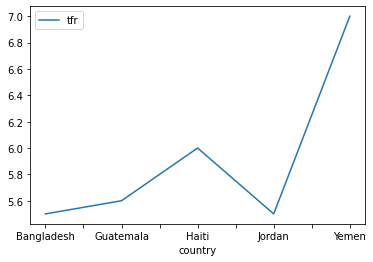

In [78]:
r.plot(x='country', y='tfr')